# predict emotion from face image using pre-trained model

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import PIL.Image
from PIL import Image 
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load saved model
model = load_model('facial_expression_emotion.h5')

# set emotion_map
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

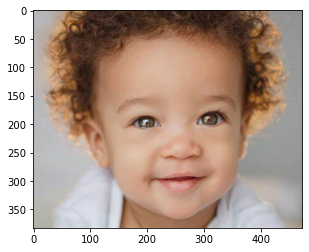

(48, 48)
L
made to array
flattened
2304
reshaped
[[185 184 182 ... 148 145 145]
 [185 184 182 ... 150 146 146]
 [184 184 182 ... 148 147 147]
 ...
 [179 180 178 ... 161 157 151]
 [177 177 178 ... 159 153 145]
 [177 177 177 ... 168 160 152]]
1/1 [==============================] - 0s 24ms/step
Neutral


In [9]:
def pre_process_image_file(image):
    resized = image.resize((48,48))
    print(resized.size)
    converted_image = resized.convert('L')
    print(converted_image.mode)
    img_arr = np.array(converted_image)
    print("made to array")
    img_flat = img_arr.flatten()
    print("flattened")
    print(img_flat.size)
    img_reshaped = np.reshape(img_flat,(48, 48, 1))
    print("reshaped")
    img_normalized = img_reshaped/255.0
    print(img_arr)
    return img_normalized      #here img_arr was returned instead of img_normalized

def predict_emotion(image_file):
    # preprocess image
    image = pre_process_image_file(image_file)
    
    # make prediction
    pred = model.predict(np.expand_dims(image, axis =0))    #model.predict expects a batch of images, not a single image bt we are testing for a single img.
    
    # get predicted label
    label = np.argmax(pred)
    
    # get predicted emotion
    emotion = emotion_map[label]
    
    return emotion

image = Image.open("baby.jpg")

imgplot=plt.imshow(image)
plt.show()
emotion = predict_emotion(image)
print(emotion)